# Exploratory Data Analysis on Car Features and Price

The dataset used here is downloaded from Kaggle.

The goal of this EDA is to answer following questions:
1. Effects of features on the price
2. How does the brand affect the price?
3. Price VS. popularity?
4. Does Brand affect the Popularity?


##### 1. Importing all the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

###### %matplotlib inline is a magic function
It means that any graph which we are creating as a part of our code will appear in the same notebook and not in separate window which would happen if we have not used this magic statement.

###### sns.set(color_codes=True)
It will load seaborn's default theme and color palette to the session.

##### 2. Loading data into dataframes using Pandas

The file is a csv file hence we will use the read_csv function

In [2]:
df = pd.read_csv("data.csv").convert_dtypes()

#print first 5 data entries
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


##### 3. Checking the datatype of the columns

In [4]:
df.dtypes

Make                 string
Model                string
Year                  Int64
Engine Fuel Type     string
Engine HP             Int64
Engine Cylinders      Int64
Transmission Type    string
Driven_Wheels        string
Number of Doors       Int64
Market Category      string
Vehicle Size         string
Vehicle Style        string
highway MPG           Int64
city mpg              Int64
Popularity            Int64
MSRP                  Int64
dtype: object

##### 4. Removing columns which are not necessary for the analysis

Dropping columns Engine Fuel type, Number of Doors and Market Category because it is not important for the analysis in our case.

In [5]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Number of Doors'], axis=1)

df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##### 5. Renaming certain column names for better readability and usability

In [6]:
df = df.rename(columns={"Engine HP": "HP", 
                        "Engine Cylinders": "Cylinders", 
                        "Transmission Type": "Transmission", 
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H", 
                        "city mpg": "MPG-C", 
                        "MSRP": "Price" })

df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


##### 6. Cleaning Data


In [7]:
#indentifying duplicate rows

duplicate_df = df[df.duplicated()]
print("Total duplicate rows ", duplicate_df.shape)

Total duplicate rows  (792, 13)


In [8]:
# counting number of rows
df.count()

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

In [9]:
# removing duplicate rows
df = df.drop_duplicates()

df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [10]:
# identifying columns with null values

print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [11]:
# dropping null values

df = df.dropna()

df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [12]:
# rechecking for null values to make sure data is cleaned

print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


<AxesSubplot:xlabel='Price'>

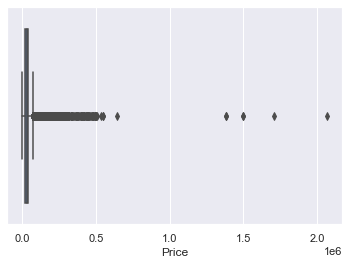

In [14]:
# Detecting Outliers by plotting Boxplot graph

sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Cylinders'>

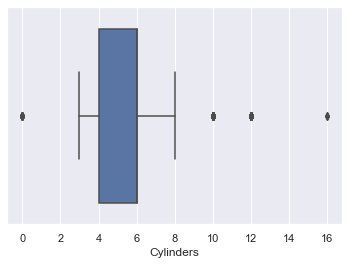

In [16]:
sns.boxplot(x=df['Cylinders'])

<AxesSubplot:xlabel='HP'>

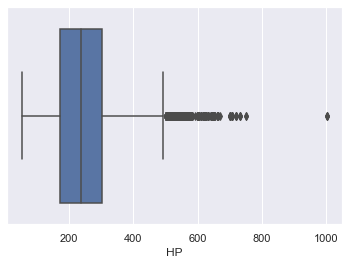

In [17]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='MPG-H'>

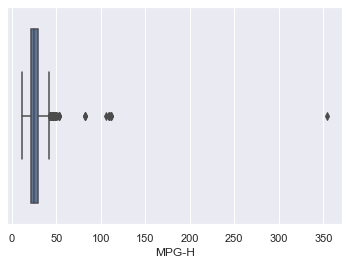

In [18]:
sns.boxplot(x=df['MPG-H'])

<AxesSubplot:xlabel='MPG-C'>

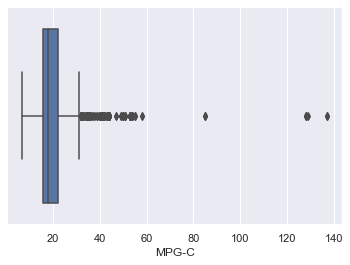

In [19]:
sns.boxplot(x=df['MPG-C'])

In [20]:
# Boxplot uses IQR to display data & outlier.

# finding IQR for every column

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year               9.0
HP               131.0
Cylinders          2.0
MPG-H              8.0
MPG-C              6.0
Popularity      1460.0
Price         21426.25
dtype: Float64


In [24]:
# removing outliers

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

##### 7. Plotting various visuals to find patterns that can help with analysis

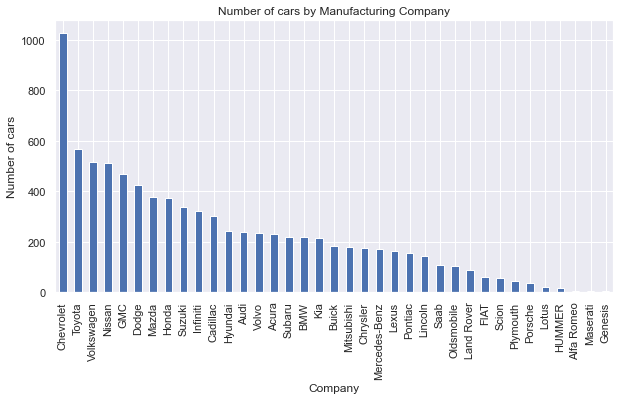

In [28]:
# plotting a Bar Graph to find which manufactures makes highest number of cars

df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Manufacturing Company")
plt.ylabel('Number of cars')
plt.xlabel('Company'); # make column in data represents Company that manufactures car

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


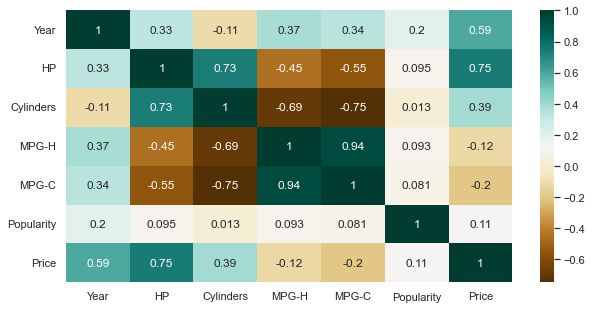

In [29]:
# plotting Heatmap to visualize the relation between the features

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

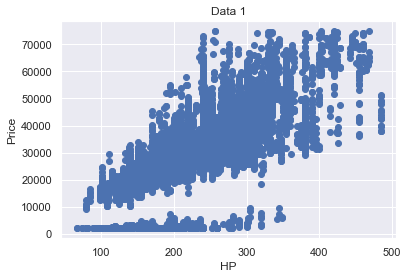

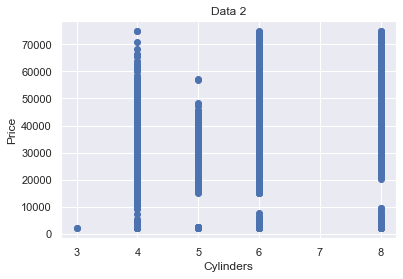

In [48]:
# Plotting scatterplot to find correlation between HP and Price

fig, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.scatter(df['HP'], df['Price'])
ax1.set_title('Data 1')
ax1.set_xlabel('HP')
ax1.set_ylabel('Price')

ax2.scatter(df['Cylinders'], df['Price'])
ax2.set_title('Data 2')
ax2.set_xlabel('Cylinders')
ax2.set_ylabel('Price')


plt.show()

##### 8. Performing ANOVA to find correlation between categorical and numerical features

ANOVA hypothesis test

* Null hypothesis(H0): The variables are not correlated with each other
* P-value: The probability of Null hypothesis being true
* Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
* Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [53]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between Popularity and Make (Company)
# Assumption(H0) is that Make and Popularity are NOT correlated

# Finds out the Popularity data for each Make as a list
CategoryGroupLists = df.groupby('Make')['Popularity'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


From above ANOVA test we got P-Value =0, which means Popularity is correlated to Make.

In [58]:
# Running the one-way anova test between Price and Make
# Assumption(H0) is that Make and Price are NOT correlated

# Finds out the Price data for each Make as a list
CategoryGroupLists = df.groupby('Make')['Price'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


From above ANOVA test we got P-Value =0, which means Price is correlated to Make.

## Findings

1. Popularity of a car has no affect on its price.
2. Horsepower (HP) is the only feature that affects the Price of a car. 
3. Brand does affect the popularity and price of a car.
